In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [34]:
data = pd.read_csv('airline_passenger_satisfaction.csv')
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [36]:
# check for missing values 
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [37]:
data.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [38]:
# see quick info of category values 
data.describe(include = object)

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


In [39]:
# show the unique values of each category
for column in data.select_dtypes(include = object):
    print(column)
    print(data[column].unique())
    print()

Gender
['Male' 'Female']

Customer Type
['First-time' 'Returning']

Type of Travel
['Business' 'Personal']

Class
['Business' 'Economy' 'Economy Plus']

Satisfaction
['Neutral or Dissatisfied' 'Satisfied']



In [40]:
# The 14 columns starting from column 10 are also categories, but they are numbers, so check how many different numbers there are
for column in data.columns[9:23]:
    print(column)
    print(data[column].unique())
    print()

Departure and Arrival Time Convenience
[3 2 4 1 5 0]

Ease of Online Booking
[3 2 4 1 5 0]

Check-in Service
[4 3 1 2 5 0]

Online Boarding
[3 5 4 2 1 0]

Gate Location
[3 2 4 1 5 0]

On-board Service
[3 5 4 2 1 0]

Seat Comfort
[5 4 3 2 1 0]

Leg Room Service
[2 5 3 4 1 0]

Cleanliness
[5 4 3 2 1 0]

Food and Drink
[5 3 4 2 1 0]

In-flight Service
[5 3 4 1 2 0]

In-flight Wifi Service
[3 2 4 1 0 5]

In-flight Entertainment
[5 3 4 2 1 0]

Baggage Handling
[5 3 4 1 2]



In [41]:
# create function to visualized categorical column
import seaborn as sns

# set style of visualization
sns.set_style("whitegrid")
sns.set_palette("RdBu")
def count_plot(column_name):
    graph = sns.countplot(x = column_name, data = data, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
    
    plt.show()

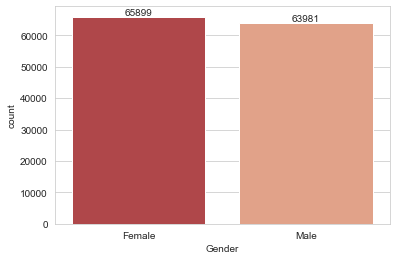

In [42]:
# visualized column 

count_plot("Gender") # call function i creat it in cell 11

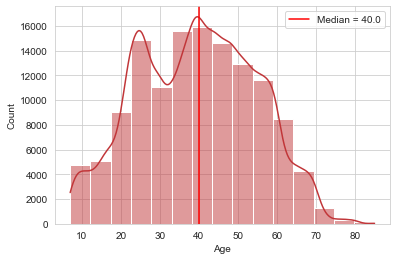

In [43]:
# see distribution 

sns.histplot(x = "Age", data = data, kde = True, bins = 15)
plt.axvline(data.Age.median(), label = f'Median = {data.Age.median()}', color = 'r')
plt.legend()
plt.show()

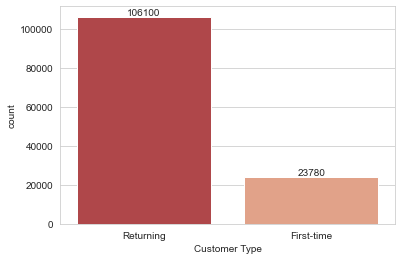

In [44]:
# visualized column 

count_plot("Customer Type") # call function i creat it in cell 11

In [45]:
data['Flight Distance'].describe()

count    129880.000000
mean       1190.316392
std         997.452477
min          31.000000
25%         414.000000
50%         844.000000
75%        1744.000000
max        4983.000000
Name: Flight Distance, dtype: float64

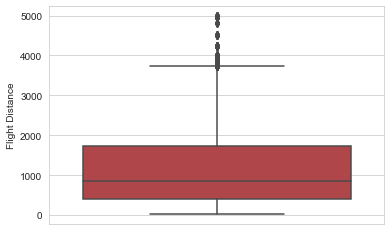

In [46]:
sns.boxplot(y = "Flight Distance", data = data)
plt.show()

In [53]:
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# arctan function and scaling it in range 0 to 1
def adjarctan(x):
    return np.arctan(x) / (np.pi / 2)

In [79]:
data1 = data.copy(deep=True)
# drop the id column
data1 = data1.drop("ID", axis = 1)

In [80]:
# boxcox transformation
from scipy.stats import boxcox
data1["Flight Distance"] = boxcox(data1["Flight Distance"] + 1)[0]
# range scaling of the flight distance to 0 to 1
data1["Flight Distance"] = (data1["Flight Distance"] - data1["Flight Distance"].min()) / (data1["Flight Distance"].max() - data1["Flight Distance"].min())
data1["Flight Distance"].describe()

count    129880.000000
mean          0.587747
std           0.192555
min           0.000000
25%           0.440026
50%           0.585223
75%           0.745202
max           1.000000
Name: Flight Distance, dtype: float64

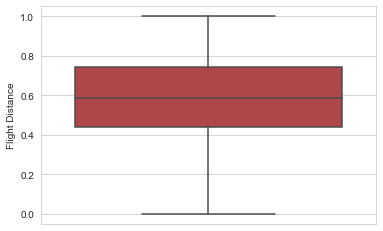

In [81]:
sns.boxplot(y = "Flight Distance", data = data1)
plt.show()

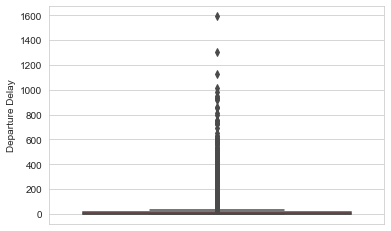

In [68]:
# see distribution 

sns.boxplot(y = "Departure Delay", data = data)
plt.show()

In [69]:
data["Departure Delay"].describe()

count    129880.000000
mean         14.713713
std          38.071126
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay, dtype: float64

In [84]:
data1["Departure Delay"] = adjarctan(data1["Departure Delay"])
data1["Departure Delay"].describe()

count    129880.000000
mean          0.394156
std           0.457090
min           0.000000
25%           0.000000
50%           0.000000
75%           0.947071
max           0.999600
Name: Departure Delay, dtype: float64

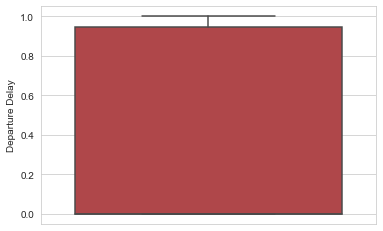

In [85]:
sns.boxplot(y = "Departure Delay", data = data1)
plt.show()

In [87]:
# drop the Arrival Delay column's missing values
data1 = data1.dropna(subset = ["Arrival Delay"])
data1["Arrival Delay"].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

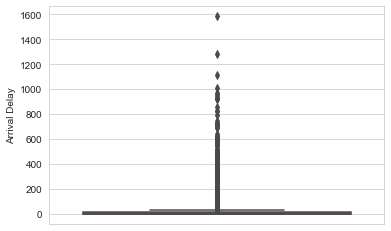

In [89]:
sns.boxplot(y = "Arrival Delay", data = data)
plt.show()

In [90]:
# arctan transformation of the arrival delay
data1["Arrival Delay"] = adjarctan(data1["Arrival Delay"])
data1["Arrival Delay"].describe()

d:\Anaconda\envs\tf_torch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    129487.000000
mean          0.400779
std           0.460464
min           0.000000
25%           0.000000
50%           0.000000
75%           0.951125
max           0.999598
Name: Arrival Delay, dtype: float64

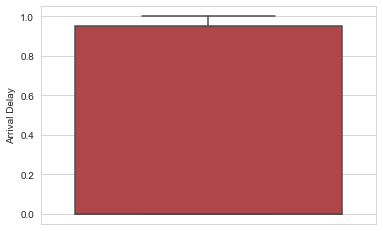

In [91]:
sns.boxplot(y = "Arrival Delay", data = data1)
plt.show()

In [96]:
# check the 95% quantile of the arrival delay and 99% quantile of the arrival delay
print(data1["Arrival Delay"].quantile(0.65))
print(data1["Arrival Delay"].quantile(0.95))
print(data1["Arrival Delay"].quantile(0.99))

0.8743340836219977
0.9918386551749465
0.9965021243623433


In [97]:
# create list of services columns

services_columns = data.columns[9:-1].tolist()

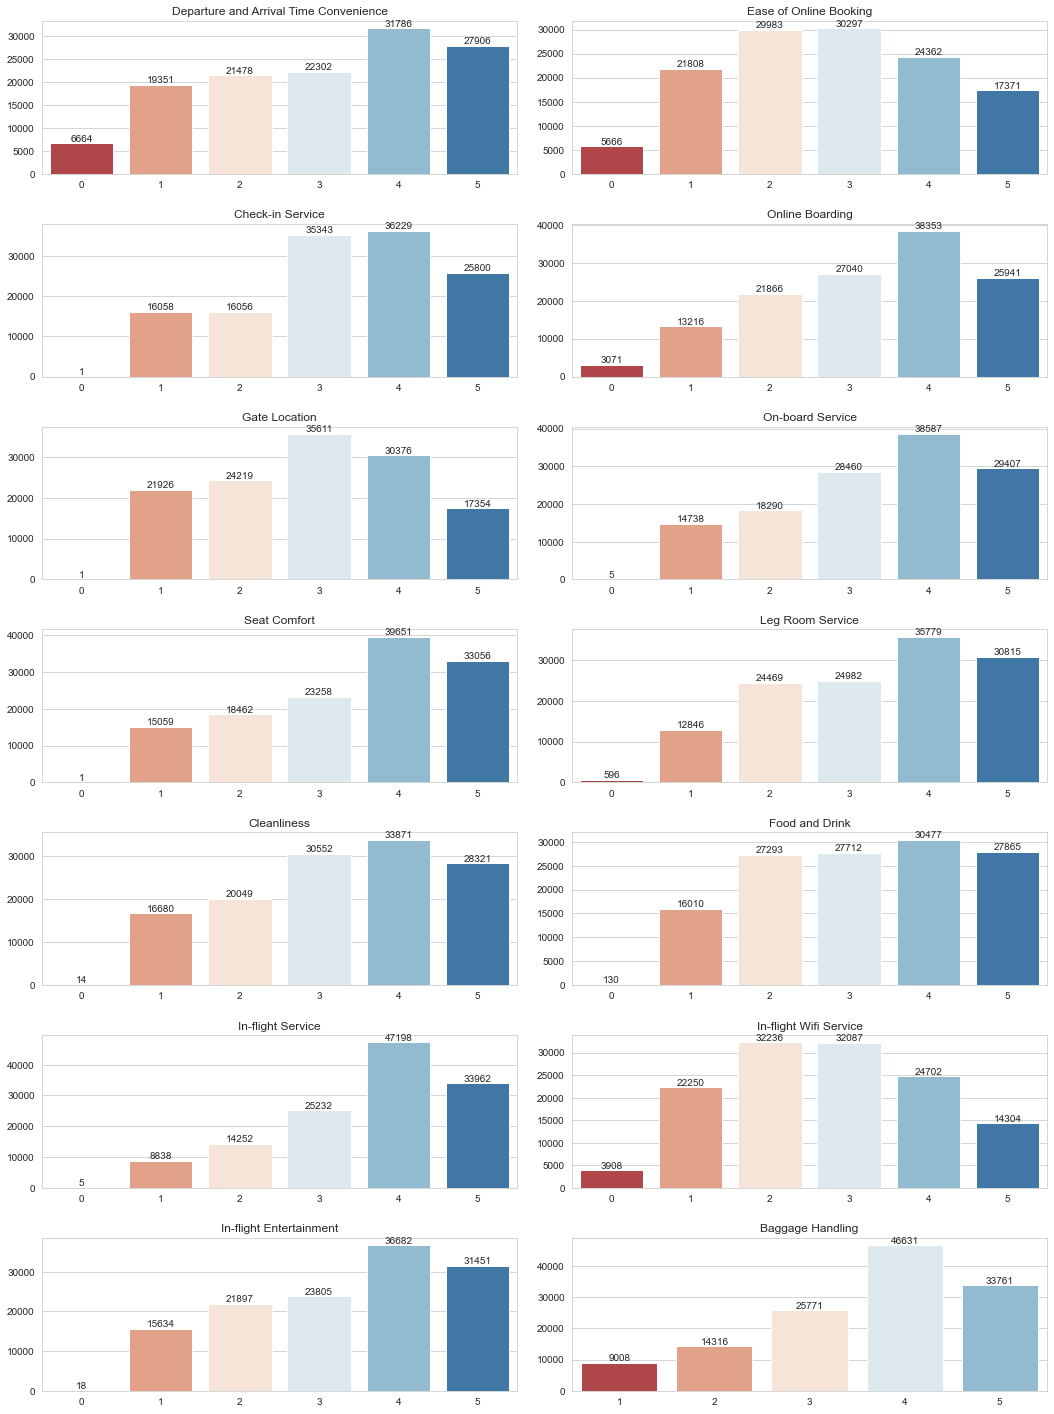

In [99]:
# visualized columns

# 1- set figure size
plt.figure(figsize=(15, 20))

# 2- loop over services list to plot columns
for index, col in enumerate(services_columns):
    plt.subplot((len(services_columns) + 1) // 2, 2, index + 1) # create sub-plot
    
    graph = sns.countplot(x = col, data = data1)
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.title(col, ) # set title to each plot
    graph.set_xlabel("") # replace x label with empty string
    graph.set_ylabel("") # replace y label with empty string
 
# 3- set layout between two plots
plt.tight_layout(pad = 2)

plt.show()